In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import time
import datetime

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_excel('raw_data_with_label.xlsx', sheet_name='links', index_col=0)
df = df[df['y'].notnull()]
df.head()

,link,title,canal_nome,canal_link,view_counts,video_date,like,dislike,y
0,https://www.youtube.com/watch?v=-0WQnwNFqJM,AI learns to Speedrun QWOP using Machine Learning,Wesley Liao,https://www.youtube.com/channel/UCair-JZ6XmtJk...,226613.0,25 de fev. de 2021,"2.729 marcações ""Gostei""","33 marcações ""Não gostei""",0.0
1,https://www.youtube.com/watch?v=-5hEYRt8JE0,How to Become A Machine Learning Engineer | Ho...,#MachineLearningAlgorithms,https://www.youtube.com/hashtag/machinelearnin...,53263.0,3 de set. de 2018,"1.407 marcações ""Gostei""","27 marcações ""Não gostei""",0.0
2,https://www.youtube.com/watch?v=-6RqxhNO2yY,Python For Data Science Full Course - 9 Hours ...,#edureka,https://www.youtube.com/hashtag/edureka,142715.0,15 de mar. de 2020,"3.990 marcações ""Gostei""","57 marcações ""Não gostei""",0.0
3,https://www.youtube.com/watch?v=-AkBfBWr_Gw,Can You Become a Data Scientist?,#data,https://www.youtube.com/hashtag/data,776910.0,14 de ago. de 2018,"12.316 marcações ""Gostei""","431 marcações ""Não gostei""",0.0
4,https://www.youtube.com/watch?v=-DDrE6T0ct4,Binary Image Classification with CNN (Deep Lea...,#download,https://www.youtube.com/hashtag/download,2290.0,23 de mar. de 2020,"66 marcações ""Gostei""","Sem marcações ""Não gostei""",1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   link         501 non-null    object 
 1   title        497 non-null    object 
 2   canal_nome   498 non-null    object 
 3   canal_link   498 non-null    object 
 4   view_counts  498 non-null    float64
 5   video_date   418 non-null    object 
 6   like         484 non-null    object 
 7   dislike      484 non-null    object 
 8   y            501 non-null    float64
dtypes: float64(2), object(7)
memory usage: 39.1+ KB


In [5]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   link         417 non-null    object 
 1   title        417 non-null    object 
 2   canal_nome   417 non-null    object 
 3   canal_link   417 non-null    object 
 4   view_counts  417 non-null    float64
 5   video_date   417 non-null    object 
 6   like         417 non-null    object 
 7   dislike      417 non-null    object 
 8   y            417 non-null    float64
dtypes: float64(2), object(7)
memory usage: 32.6+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.y.value_counts()

0.0    345
1.0     72
Name: y, dtype: int64

In [8]:
df.shape

(417, 9)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
df_limpo = pd.DataFrame(index=df.index)

## 1. Limpeza da data

In [11]:
clean_date = df['video_date'].str.extract(r'(\d+) de (\w+)\. de (\d+)')
clean_date

,0,1,2
0,25,fev,2021
1,3,set,2018
2,15,mar,2020
3,14,ago,2018
4,23,mar,2020
...,...,...,...
494,18,mar,2019
495,10,nov,2020
496,8,mar,2017
498,11,dez,2015


In [12]:
clean_date[0] = clean_date[0].map(lambda x: "0"+ x[0] if len(x[0]) == 1 else x)
clean_date.head()

,0,1,2
0,02,fev,2021
1,03,set,2018
2,01,mar,2020
3,01,ago,2018
4,02,mar,2020


In [13]:
mapa_meses = {
    'jan': 'Jan',
    'fev': 'Feb',
    'mar': 'Mar',
    'abr': 'Apr',
    'mai': 'May',
    'jun': 'Jun',
    'jul': 'Jul',
    'ago': 'Aug',
    'set': 'Sep',
    'out': 'Oct',
    'nov': 'Nov',
    'dez': 'Dec'
}

clean_date[1] = clean_date[1].map(mapa_meses)
clean_date = clean_date.apply(lambda x: ' '.join(x), axis=1)
clean_date.head()
df_limpo['date'] = pd.to_datetime(clean_date, format='%d %b %Y')

In [14]:
df_limpo.head(5)

,date
0,2021-02-02
1,2018-09-03
2,2020-03-01
3,2018-08-01
4,2020-03-02


(array([  3.,   3.,   3.,   7.,  22.,  30.,  49.,  77.,  88., 135.]),
 array([16131. , 16387.4, 16643.8, 16900.2, 17156.6, 17413. , 17669.4,
        17925.8, 18182.2, 18438.6, 18695. ]),
 <BarContainer object of 10 artists>)

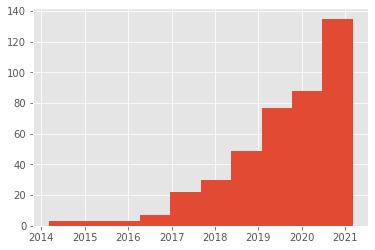

In [15]:
plt.hist(df_limpo['date'])

In [16]:
indexs = df_limpo['date'].loc[df_limpo['date'].dt.year < 2018].index.values

In [17]:
df_limpo.drop(index=indexs, axis='rows', inplace=True)
df.drop(index=indexs, axis='rows', inplace=True)

(array([16., 25., 24., 20., 38., 35., 39., 47., 43., 83.]),
 array([17533. , 17649.2, 17765.4, 17881.6, 17997.8, 18114. , 18230.2,
        18346.4, 18462.6, 18578.8, 18695. ]),
 <BarContainer object of 10 artists>)

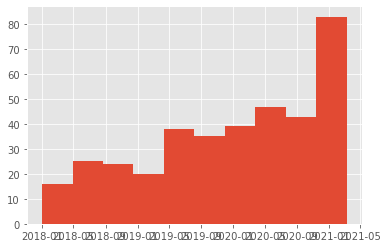

In [18]:
plt.hist(df_limpo['date'])

## 2. Views

In [19]:
df_limpo['views'] = df['view_counts'].astype(int)

## 3. Features

In [20]:
features = pd.DataFrame(index=df_limpo.index)
y = df['y'].copy()

In [21]:
features['tempo_desde_pub'] = (pd.to_datetime('2021-03-18') - df_limpo['date']) / np.timedelta64(1, 'D')
features['views'] = df_limpo['views']
features['views_por_dia'] = features['views'] / features['tempo_desde_pub']

In [22]:
features.drop(columns=['tempo_desde_pub'], inplace=True)
features.head()

,views,views_por_dia
0,226613,5150.295455
1,53263,57.457389
2,142715,373.599476
3,776910,809.281250
4,2290,6.010499


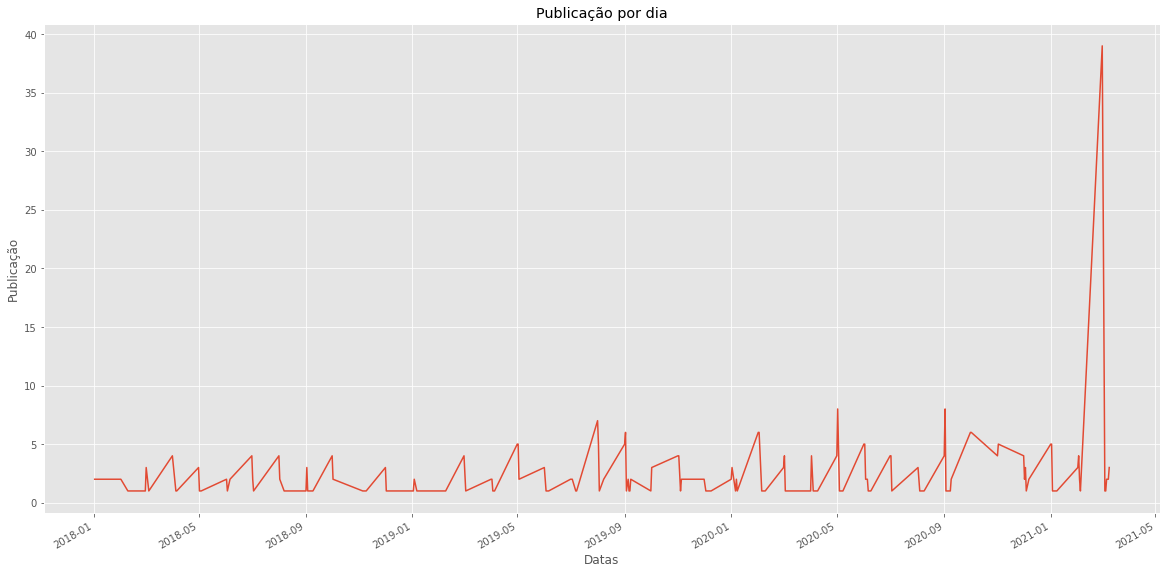

In [23]:
ax = df_limpo['date'].value_counts().plot(figsize=(20,10), title='Publicação por dia', xlabel='Datas', ylabel='Publicação')

In [24]:
qtd = len(df_limpo['date'])
meio = qtd // 2 if qtd % 2 == 0 else (qtd // 2) + 1
date = str(pd.Timestamp(df_limpo.sort_values(by='date')['date'].values[meio]).date())

In [25]:
X_train, X_val = features[df_limpo['date'] < date], features[df_limpo['date'] >= date]
y_train, y_val = y[df_limpo['date'] < date], y[df_limpo['date'] >= date]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(185, 2) (185,) (185, 2) (185,)


In [26]:
y_val.value_counts() # classe desbalanceada

0.0    149
1.0     36
Name: y, dtype: int64

In [27]:
y_val.mean() * X_train.shape[0]

36.0

In [28]:
mdl = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight='balanced') # class_weigth -> pondera o peso para a classe com menor exemplos dando uma ponderação maior
mdl.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [29]:
p = mdl.predict_proba(X_val)[:, 1] # pegando apenas as probabilidades de serem 1

In [30]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [31]:
average_precision_score(y_val, p) 
# Precisão: De todos os exemplos que o modelo disse que são positivos, quantos ele realmente acertou.
# Recal: Taxa de detecção. De todos os exemplos que são realmente positivos, quantos o meu modelo previu como sendo positivo.

0.22437851409702553

In [32]:
roc_auc_score(y_val, p) # Área sob a curva do ROC

# Dada uma relação de itens positivos e negativos e uma relação de taxa de probabilidade desses itens serem positivos e negativos identificados pelo modelo.
positivo = [0.1, 0.02, 0.3]
negativo = [0.05, 0.15, 0.25]

# Com base em escolha de itens aleatorios com reposição é validdo
# pos = 0.1 / neg = 0.05 => True
# pos = 0.02, / neg = 0.15 => False

# A média de varios exemplos (tuplas entre positivo e negativo de mesmo indice) resultará em um valor de média de resultados de positivos e negativos.

In [33]:
from sklearn.metrics import roc_curve

In [34]:
ns = [0 for _ in range(len(y_val))]
print(roc_auc_score(y_val, ns))

0.5


[]

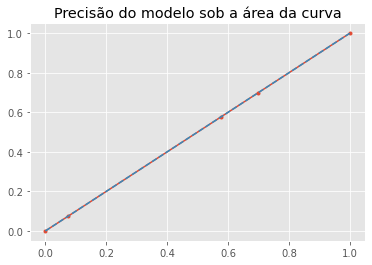

In [35]:
ns_rfp, ns_tpr, _ = roc_curve(y_val, ns) 
p_rfp, p_tpr, _ = roc_curve(y_val, p)

plt.title("Precisão do modelo sob a área da curva")
plt.plot(p_rfp, p_rfp, marker='.', label='Tree classifier')
plt.plot(ns_rfp, ns_tpr, linestyle='--', label='No skill')
plt.plot()

In [36]:
from sklearn.tree import plot_tree

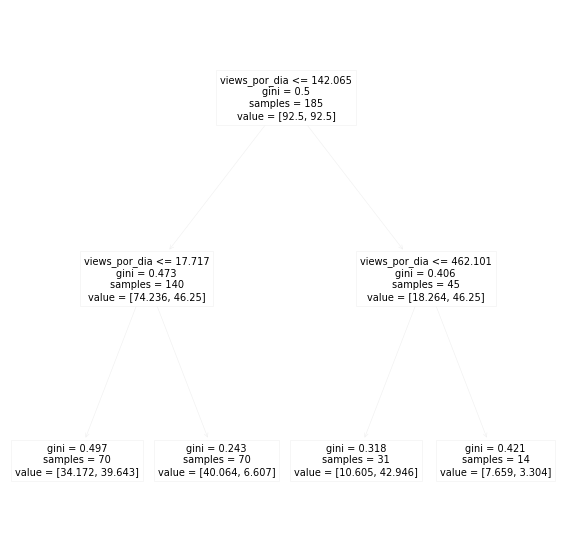

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.set_title('Árvore de decisão')
plot_tree(mdl, ax=ax, feature_names=X_train.columns)
plt.show()